# Data Analysis project 1

#### Is the Movie Industry Dying? Is Netflix the New Entertainment King?

Those were the first questions that led to the data analysis project  
focused on movie revenue and its trends over the last decades.  

But why stop there?  
There are more factors that influence this kind of thing, such as:  
- **Actors**  
- **Genres**  
- **User ratings**  
- **And more...**  

Now, anyone with experience  can ask specific questions about the  
movie industry and get answers!


In [1]:
# import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as plx
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# import dataframe
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 4.5 MB


In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Data cleaning
df=df.dropna(axis=0)
df[["votes","budget","gross","runtime"]]=df[["votes","budget","gross","runtime"]].astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   int64  
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 677.6+ KB


In [7]:
def extract_year(released):
    extracted = released.split('(')[0].rstrip()
    extracted = extracted.split(',')[1]
    return int(extracted)



In [8]:
def extract_year(released):
    # Clean the string by removing anything after '(' and stripping extra spaces
    extracted = released.split('(')[0].rstrip()
    
    # Check if there's a comma in the string before trying to split
    if ',' in extracted:
        extracted = extracted.split(',')[1].strip()  # Get the year part after the comma
        return int(extracted)
    else:
        # Handle the case where the comma is missing (optional)
        return 0  # Or another appropriate value like 0, or a specific message


In [9]:
df['release_date']=[extract_year(date) for date in df.released]
df.drop(labels="year",axis=1,inplace=True)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [10]:
df_numeric=df.select_dtypes(include='number')
corr_mat=df_numeric.corr()
corr_mat["gross"].sort_values(ascending=False)


gross           1.000000
budget          0.740247
votes           0.614751
runtime         0.275796
score           0.222556
release_date    0.055369
Name: gross, dtype: float64

Text(0.5, 1.0, 'Correlation heat map of movie data')

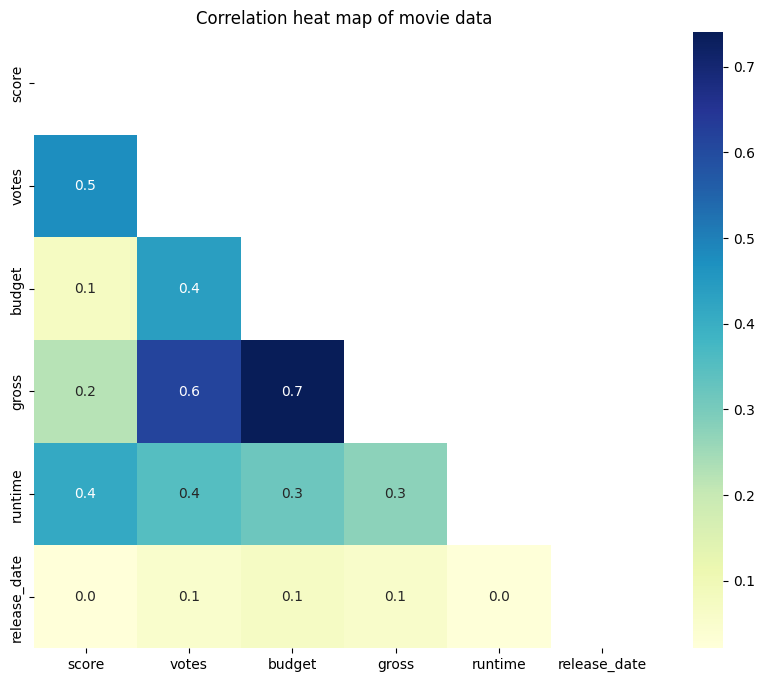

In [11]:
plt.figure(figsize=(10,8))
mask=np.triu(np.ones_like(corr_mat,dtype=bool)) #To show only the lower part of the heatmap
sns.heatmap(data=corr_mat,mask=mask,annot=True,fmt="0.1f",cmap="YlGnBu",cbar=True)
plt.title("Correlation heat map of movie data")

In [12]:
df_genre=df.groupby(by="genre")["gross"].sum().reset_index(name='Total_revenue').sort_values(by="Total_revenue",ascending=False)
df_genre["Total_revenue"] = df_genre["Total_revenue"].apply(lambda x: f"{x/1e6:.2f}M")
df_genre.head()

,genre,Total_revenue
0,Action,237752.87M
4,Comedy,88514.82M
2,Animation,77865.91M
6,Drama,52098.56M
1,Adventure,43578.71M


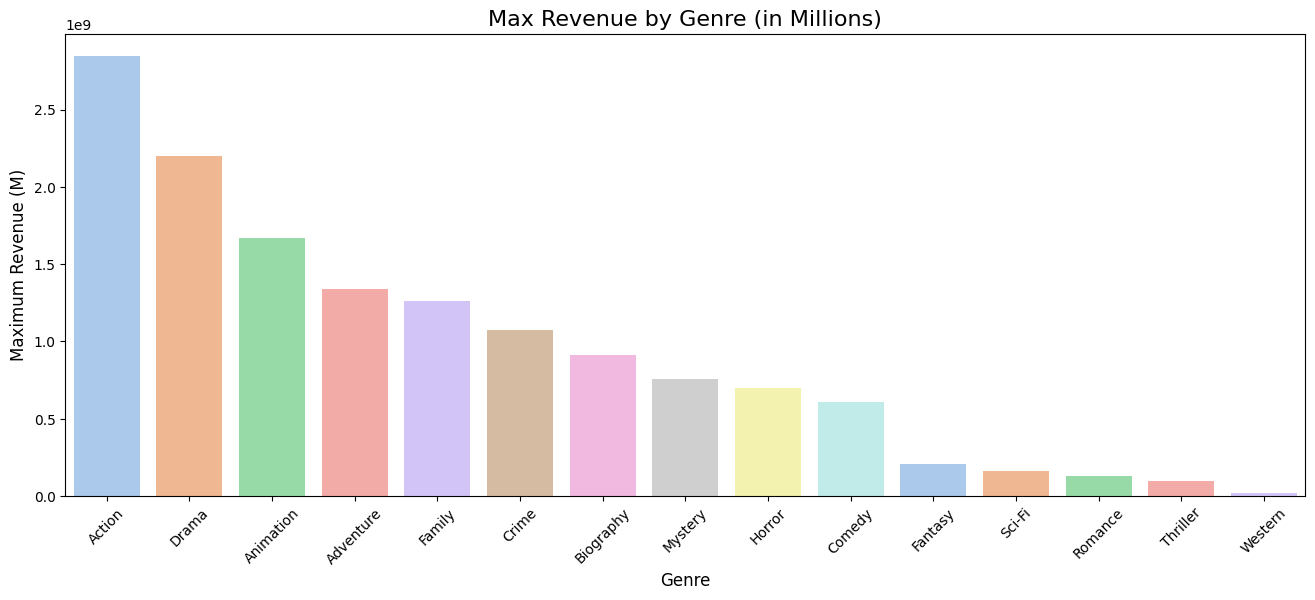

In [13]:
plt.figure(figsize=(16, 6)) 
sorted_df=df.sort_values(by="gross",ascending=False)
sns.barplot(data=sorted_df, x='genre', y='gross', palette='pastel',ci=None,estimator='max')
plt.title("Max Revenue by Genre (in Millions)", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Maximum Revenue (M)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

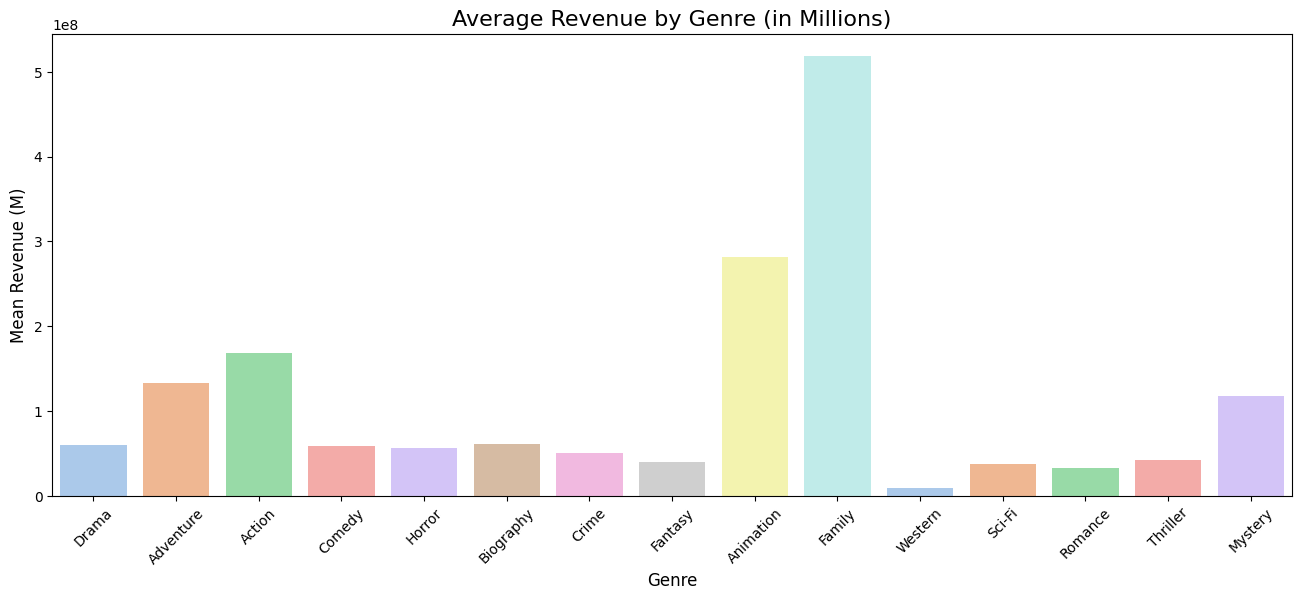

In [14]:
plt.figure(figsize=(16, 6)) 
sns.barplot(data=df, x='genre', y='gross', palette='pastel',ci=None,estimator='mean')
plt.title("Average Revenue by Genre (in Millions)", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Mean Revenue (M)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [15]:
df.groupby(by='country')["name"].count().reset_index().sort_values(by='name',ascending=False).head()

,country,name
47,United States,4319
46,United Kingdom,492
6,Canada,111
14,France,105
15,Germany,82


In [16]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [38]:
df.release_date.unique()

array([1980, 1981, 1984, 1983, 1982,    0, 1987, 1985, 1986, 1990, 1988,
       1992, 1989, 1991, 1999, 1994, 1993, 1995, 2001, 1996, 2000, 1997,
       1998, 2002, 2003, 2004, 2014, 2005, 2006, 2007, 2008, 2010, 2009,
       2013, 2011, 2016, 2015, 2012, 2017, 2018, 2019, 2020])

In [17]:
df_genre_count=df.groupby(by='genre').size().reset_index(name='count').sort_values(by='count',ascending=False)
df_genre_count.head()

,genre,count
4,Comedy,1496
0,Action,1415
6,Drama,863
5,Crime,399
1,Adventure,327


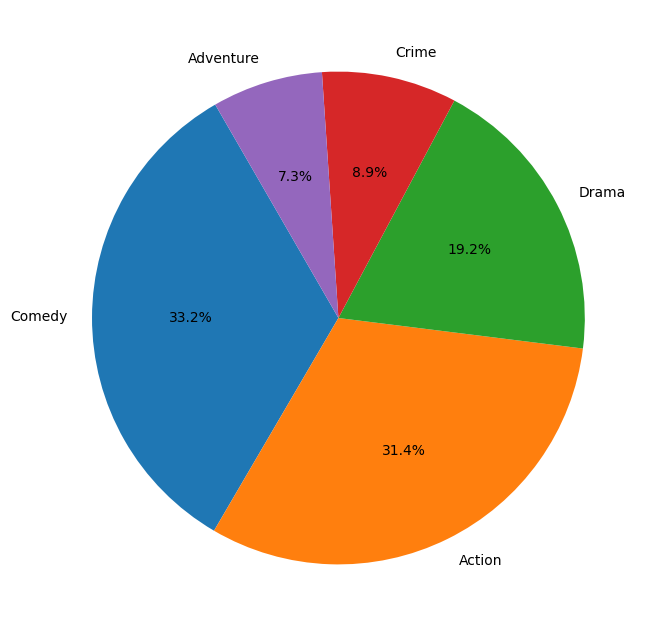

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(
    df_genre_count['count'][0:5], 
    labels=df_genre_count['genre'][0:5],
    autopct='%1.1f%%',
    startangle=120,

)
plt.show()

In [36]:
df_rating = df.groupby(by='rating').agg(
    Average_revenue=('gross', 'mean'),
    Movie_count=('gross', 'count')
).reset_index().sort_values(by="Average_revenue", ascending=False)
# df_rating["Movie_count"]=df
df_rating.head()

,rating,Average_revenue,Movie_count
7,TV-MA,3.500416e+08,2
1,G,1.892453e+08,111
5,PG-13,1.541598e+08,1729
4,PG,1.377396e+08,907
6,R,5.591059e+07,2597


In [37]:
fig = plx.scatter(
    df_rating.head(),
    x='rating',  # Ratings on x-axis
    y='Average_revenue',  # Average revenue on y-axis
    size='Movie_count',  # Bubble size based on the number of movies
    color='Average_revenue',  # Color represents revenue
    hover_name='rating',  # Show rating on hover
    title="Effect of Movie Rating on Average Revenue and Movie Count",
    labels={
        'rating': 'Movie Rating',
        'Average_revenue': 'Average Revenue (in Millions)',
        'Movie_count': 'Number of Movies'
    },
    color_continuous_scale='Rainbow',  # Color gradient,
    size_max=150
)
fig.show()

# Conclusions

Based on the analysis of the movie dataset, the following key insights can be drawn:

1. **Correlation Between Budget and Gross Revenue**:  
   A strong positive correlation of **74%** (Pearson coefficient) was observed between the movie's budget and its gross revenue. This indicates that, generally, higher-budget movies tend to generate higher revenue.

2. **Correlation Between Number of Votes and Gross Revenue**:  
   There is a significant correlation of **61.4%** between the number of votes and gross revenue. This suggests that movies with more votes are likely to perform better at the box office.

3. **Minimal Impact of Release Date on Gross Revenue**:  
   The release date of a movie has almost no effect on its gross revenue, indicating that factors such as genre, marketing, and audience reception are more influential in determining revenue than the timing of release.

4. **Top Genres by Total Gross Revenue**:  
   The genres with the highest total revenue are **Action**, **Comedy**, and **Animation**. However, when considering **average revenue**, **Family** and **Animation** movies top the list, indicating these genres generate more revenue on a per-movie basis.

5. **Dominance of Five Key Genres (1980 - 2020)**:  
   From 1980 to 2020, the movie industry has predominantly focused on five main genres:  
   - **Comedy**: 33.2%  
   - **Action**: 31.4%  
   - **Drama**: 19.2%  
   - **Crime**: ~8%  
   - **Adventure**: ~8%  
   These five genres constitute the majority of movie productions in this period.

6. **Dominance of Restricted Ratings**:  
   The majority of movies are rated as **restricted** (e.g., R, NC-17), suggesting that a significant portion of movie content involves mature themes such as **sex** and **violence**.

These findings provide valuable insights into trends within the movie industry, particularly in terms of revenue patterns, genre preferences, and the impact of movie ratings.

